<a href="https://colab.research.google.com/github/swati010602/Cognitive-Situational-Analysis-and-Predictive-System/blob/main/Cognitive_Situational_Analysis_and_predective_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [ ]:
df=pd.read_csv('./emotions.csv')

In [ ]:
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [ ]:
df.shape

(1616, 2549)

In [ ]:
df.dropna()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
1610      11.400      31.4      39.9     64.70      23.9      -4.220   
1611       7.260      27.1      27.7     10.40      24.3       8.840   
1612      29.200      31.8      31.7     28.40      25.7       1.100   
1613       0.202      10.1      26.2     -9.75      25.6       1.450   
1614       3.670      19.4    -422.0      2.99      29.9       5.830   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060       3.150  ...      23.50   
1          1.680       2.880       3.830      -4.820  ...     -23.30   
2          3.360      90.200      89.900       2.030  ...     462.00   
3         -0.284       8.820       2.300      -1.970  ...     299.00   
4         -5.790       3.060      41.400       5.520  ...      12.00   
...          ...         ...         ...         ...  ...        ...   
1610      -0.930       2.580     -20.700      -1.260  ...    -145.00   
1611       6.580      31.400       0.291       0.546  ...       1.39   
1612       1.000       0.933       1.130      -1.600  ...       9.28   
1613       3.030      -3.870       1.530      -1.810  ...     -26.90   
1614      -3.410      17.000       9.730       8.740  ...     329.00   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0         20.30      20.30      23.50     -215.0     280.00    -162.00   
1        -21.80     -21.80     -23.30      182.0       2.57     -31.60   
2       -233.00    -233.00     462.00     -267.0     281.00    -148.00   
3       -243.00    -243.00     299.00      132.0     -12.40       9.53   
4         38.10      38.10      12.00      119.0     -17.60      23.90   
...         ...        ...        ...        ...        ...        ...   
1610      97.30      97.30    -145.00      382.0    -195.00     102.00   
1611      25.40      25.40       1.39       89.7      -5.64     -20.70   
1612       8.06       8.06       9.28      177.0     -14.40      36.40   
1613      18.40      18.40     -26.90      116.0      24.80      11.00   
1614     -87.00     -87.00     329.00     -409.0     357.00    -196.00   

      fft_748_b  fft_749_b     label  
0       -162.00     280.00  NEGATIVE  
1        -31.60       2.57   NEUTRAL  
2       -148.00     281.00  POSITIVE  
3          9.53     -12.40  POSITIVE  
4         23.90     -17.60   NEUTRAL  
...         ...        ...       ...  
1610     102.00    -195.00  POSITIVE  
1611     -20.70      -5.64  POSITIVE  
1612      36.40     -14.40   NEUTRAL  
1613      11.00      24.80  POSITIVE  
1614    -196.00     357.00  NEGATIVE  

[1615 rows x 2549 columns]

In [ ]:
df.shape

(1616, 2549)

In [ ]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = df.loc[df["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']

In [ ]:
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

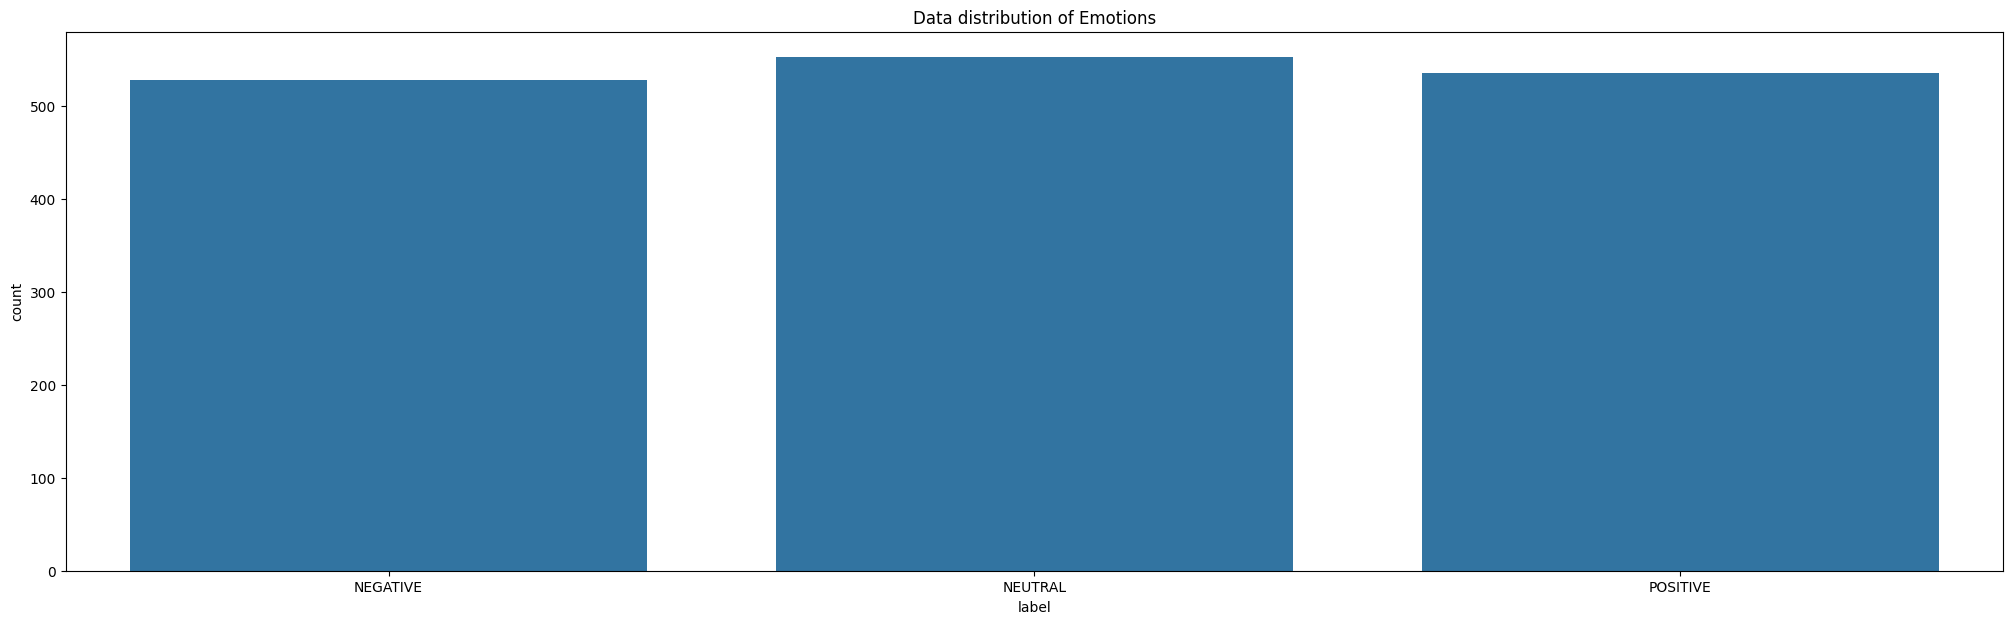

In [ ]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df)
plt.show()

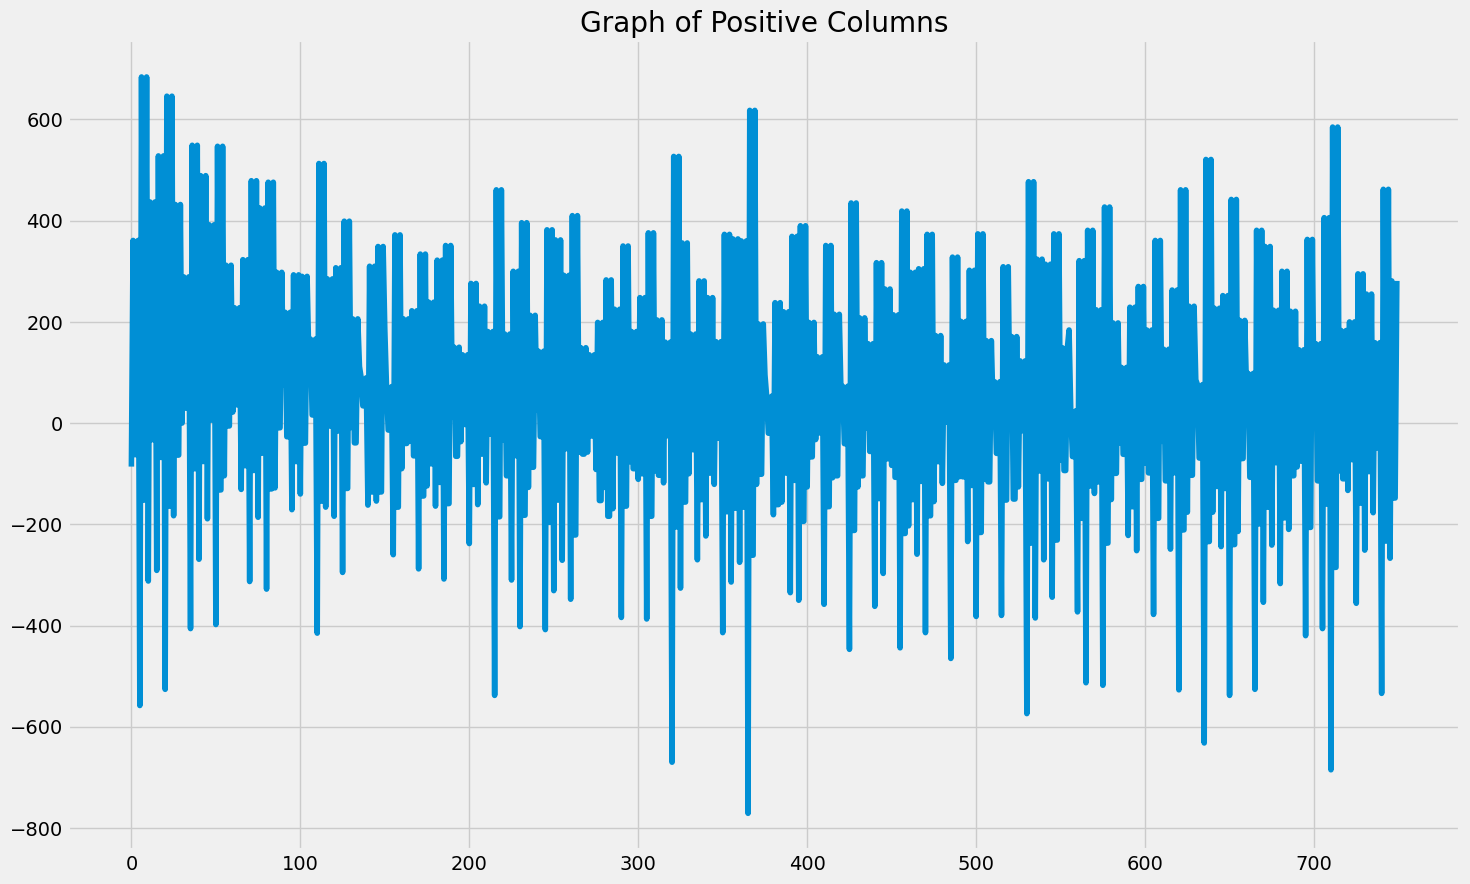

In [ ]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

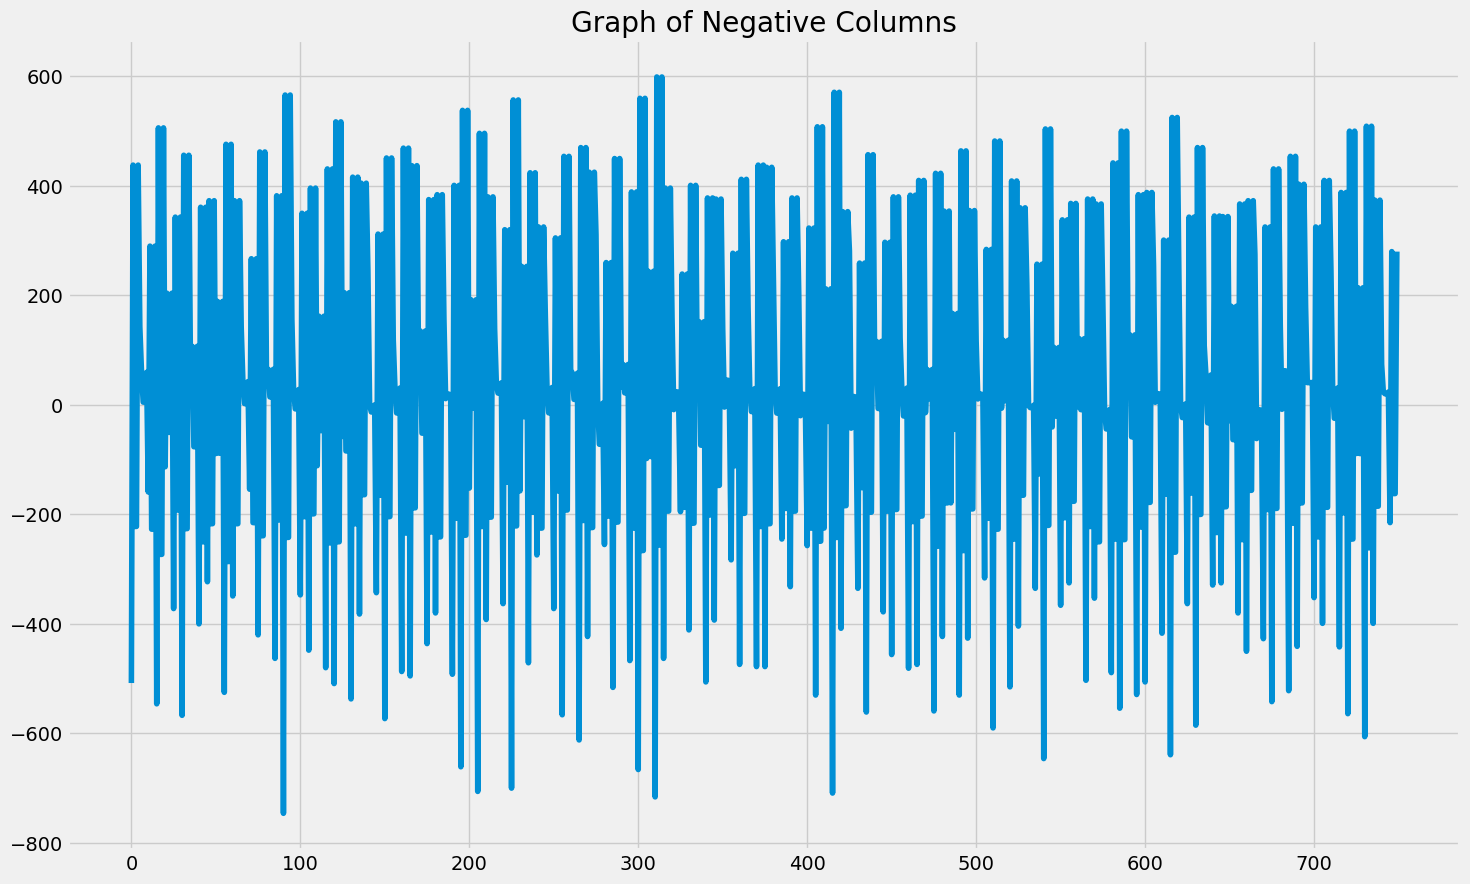

In [ ]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

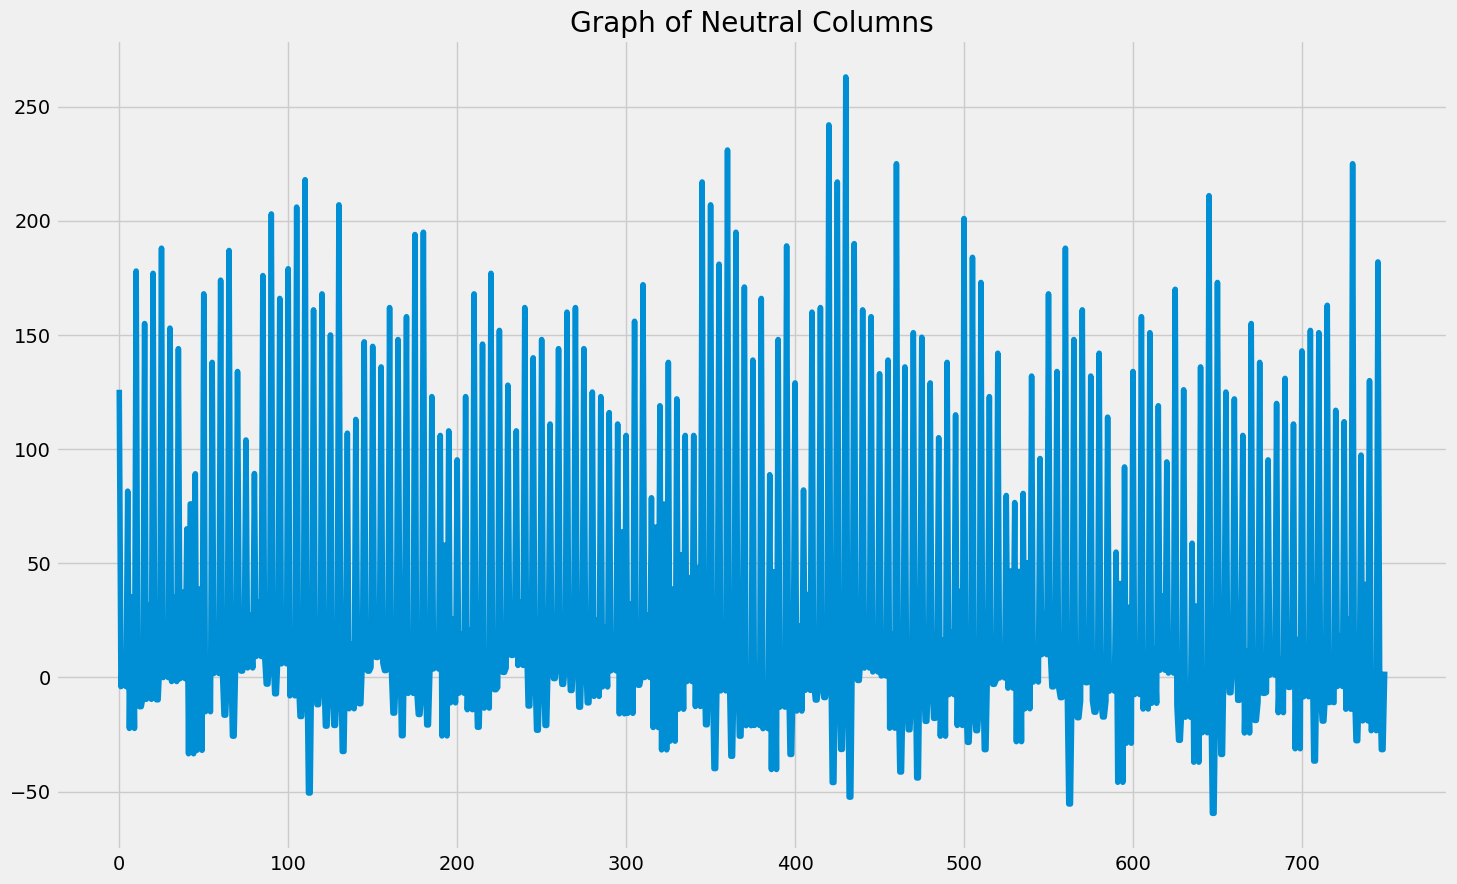

In [ ]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [ ]:
df1=df.iloc[:,1:20]
df1

mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        30.30    -356.0     15.60      26.3       1.070       0.411   
1        33.10      32.0     25.80      22.8       6.550       1.680   
2        29.40    -416.0     16.70      23.7      79.900       3.360   
3        31.60    -143.0     19.80      24.3      -0.584      -0.284   
4        31.30      45.2     27.30      24.5      34.800      -5.790   
...        ...       ...       ...       ...         ...         ...   
1611     27.10      27.7     10.40      24.3       8.840       6.580   
1612     31.80      31.7     28.40      25.7       1.100       1.000   
1613     10.10      26.2     -9.75      25.6       1.450       3.030   
1614     19.40    -422.0      2.99      29.9       5.830      -3.410   
1615      7.84      20.6    -11.50      22.9       1.420       0.392   

      mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  \
0        -15.700       2.060       3.150         2.15        29.50   
1          2.880       3.830      -4.820        25.60        32.80   
2         90.200      89.900       2.030         7.75        30.10   
3          8.820       2.300      -1.970        17.30        32.00   
4          3.060      41.400       5.520        26.10        34.30   
...          ...         ...         ...          ...          ...   
1611      31.400       0.291       0.546        -3.05        19.40   
1612       0.933       1.130      -1.600        29.30        30.20   
1613      -3.870       1.530      -1.810        -1.54         8.74   
1614      17.000       9.730       8.740        -2.90        18.20   
1615       4.750       3.750      -1.280        -5.03         8.48   

      mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  \
0         -353.00        14.40         21.5       5.980       30.70   
1           29.60        21.50         17.4      25.500       31.70   
2         -441.00         9.89         25.3     -68.900       25.30   
3         -148.00        20.40         22.8      13.200       31.50   
4           43.70        23.70         20.6      -3.870       34.10   
...           ...          ...          ...         ...         ...   
1611        -5.77        11.90         22.5       8.590       28.00   
1612        29.40        29.60         29.4      27.900       32.40   
1613        30.30        -9.14         19.6       0.462        8.50   
1614      -426.00        -2.44         28.5       4.310       24.00   
1615        18.20       -18.90         28.9       1.590        6.84   

      mean_d_7_a  mean_d_8_a  mean_d_9_a  
0         -343.0       14.70        27.9  
1           31.5       26.20        32.9  
2         -481.0      -65.40        20.0  
3         -147.0       16.90        27.7  
4           43.7      -10.00        22.9  
...          ...         ...         ...  
1611        29.2        8.70        25.6  
1612        33.0       26.10        23.8  
1613        26.0      -11.90        33.3  
1614      -435.0       -1.33        22.6  
1615        18.3       -8.10        18.3  

[1616 rows x 19 columns]

In [ ]:
df1.shape

(1616, 19)

In [ ]:
df1.columns

Index(['mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a',
       'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2',
       'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2',
       'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a'],
      dtype='object')

In [ ]:
df2=df.iloc[:,-1:]

In [ ]:
df2.shape

(1616, 1)

In [ ]:
df2.columns

Index(['label'], dtype='object')

In [ ]:
frames = [df1,df2]

In [ ]:
final_df=pd.concat(frames, axis = 1)

In [ ]:
final_df.head(2)

mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  \
0      30.3    -356.0      15.6      26.3        1.07       0.411      -15.70   
1      33.1      32.0      25.8      22.8        6.55       1.680        2.88   

   mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  \
0        2.06        3.15         2.15         29.5       -353.0         14.4   
1        3.83       -4.82        25.60         32.8         29.6         21.5   

   mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  \
0         21.5        5.98        30.7      -343.0        14.7        27.9   
1         17.4       25.50        31.7        31.5        26.2        32.9   

      label  
0  NEGATIVE  
1   NEUTRAL

0 means NEGTIVE and 1 means NEUTRAL.

In [ ]:
# plt.plot(final_df['mean_1_a'])

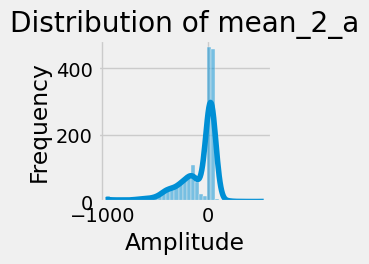

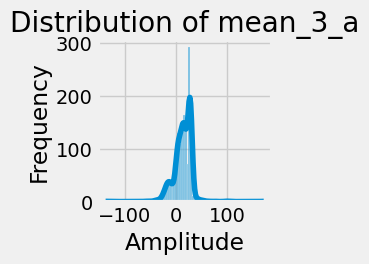

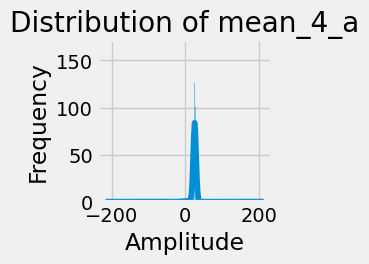

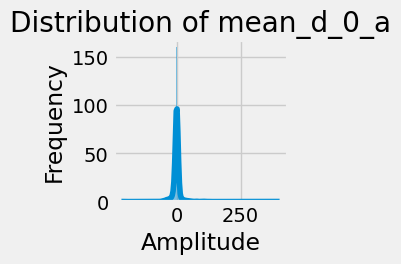

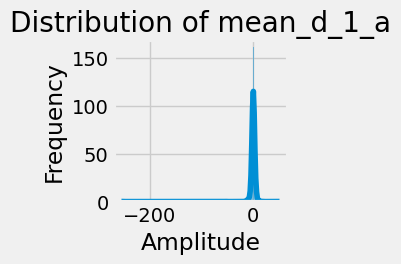

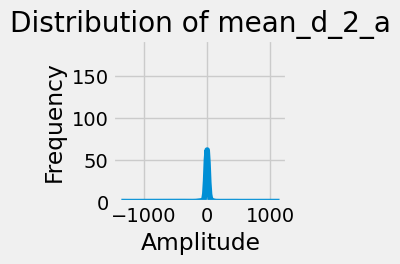

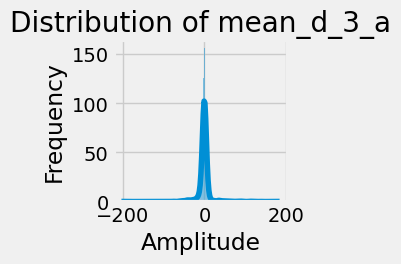

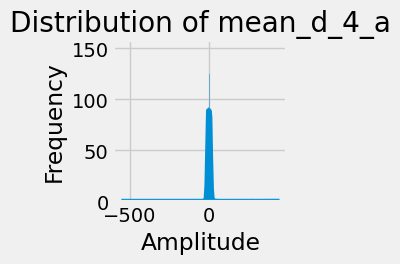

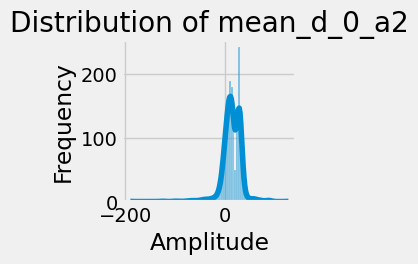

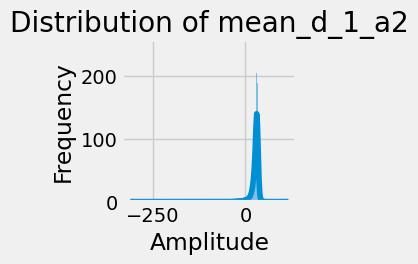

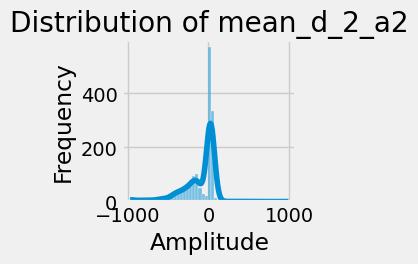

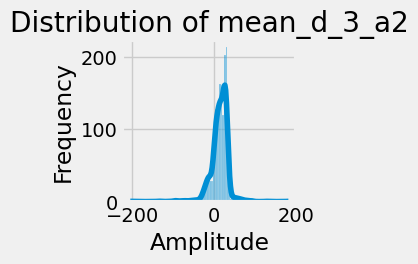

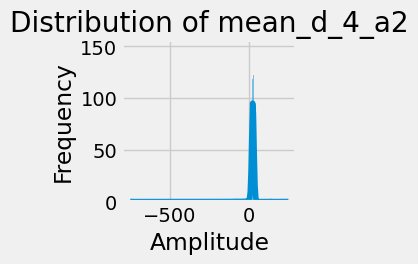

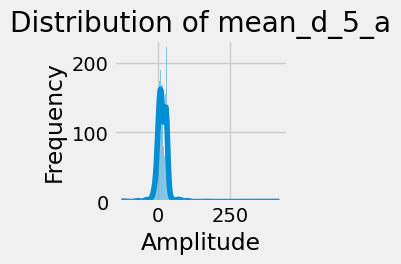

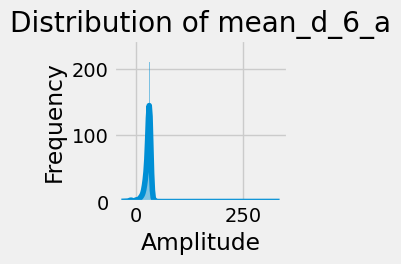

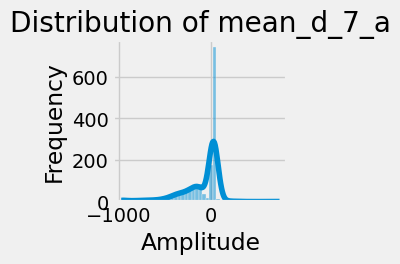

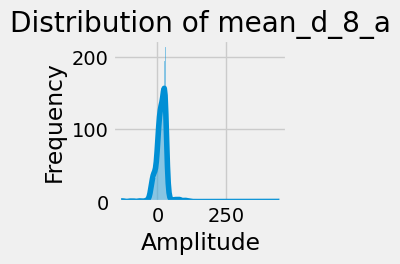

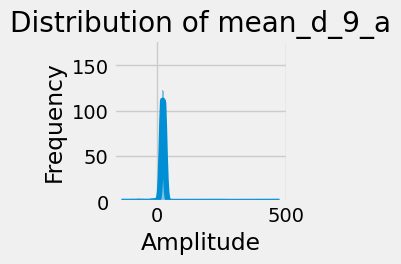

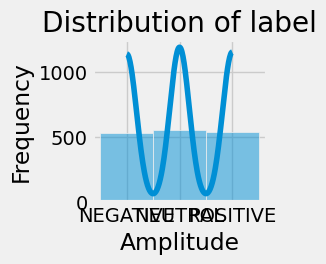

In [ ]:
# Plot the distribution of each EEG channel
eeg_channels = final_df.columns[1:] # Assuming the first column contains␣
#↪timestamps
for channel in eeg_channels:
    plt.figure(figsize=(2, 2))
    sns.histplot(final_df[channel], kde=True)
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + channel)
    plt.show()

In [ ]:
# #Generate a correlation matrix heatmap
# fig = plt.figure(figsize = (13,10))
# ax = fig.gca()
# sns.heatmap(final_df.corr(), annot=True, fmt=".2f")
# plt.title("Correlation by heatmap",fontsize=10)
# plt.show()

In [ ]:
#checking categorical columns
final_df.select_dtypes(include=['object']).columns.tolist()

['label']

In [ ]:
final_df.columns

Index(['mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a',
       'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2',
       'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2',
       'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a',
       'label'],
      dtype='object')

In [ ]:
final_df.groupby(by='label').agg('mean')[['mean_1_a', 'mean_2_a', 'mean_3_a','mean_4_a', 'mean_d_0_a',
'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2',
'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2',
'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a']]

mean_1_a    mean_2_a   mean_3_a   mean_4_a  mean_d_0_a  mean_d_1_a  \
label                                                                           
NEGATIVE  26.725379 -302.338561  11.495782  27.171383    0.004594   -0.398626   
NEUTRAL   31.403261   31.007007  27.458098  24.635688   -0.100420   -0.055655   
POSITIVE  23.277593  -55.266553   1.450542  21.016822   -0.284043    0.120806   

          mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  \
label                                                                    
NEGATIVE   -0.431538   -0.727837    0.184296     8.762341    26.338524   
NEUTRAL    -0.028977   -0.116138    0.132186    28.306582    31.619565   
POSITIVE    1.404676   -0.492789   -0.001985     6.656789    23.180815   

          mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  \
label                                                                     
NEGATIVE  -303.850758    10.680957    27.168466   10.853741   27.493883   
NEUTRAL     30.307576    26.652866    24.292826   29.599764   31.249275   
POSITIVE   -55.970342     1.984418    20.377510    6.800392   23.251845   

          mean_d_7_a  mean_d_8_a  mean_d_9_a  
label                                         
NEGATIVE -300.435824   13.007195   26.994640  
NEUTRAL    31.715290   28.354449   24.839207  
POSITIVE  -55.943616    1.417951   21.632850

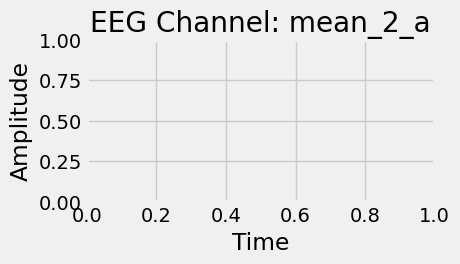

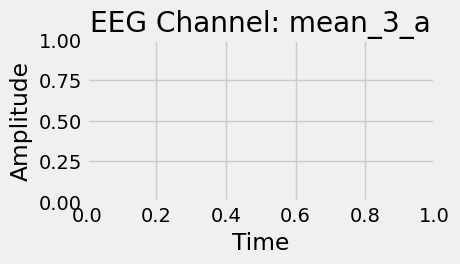

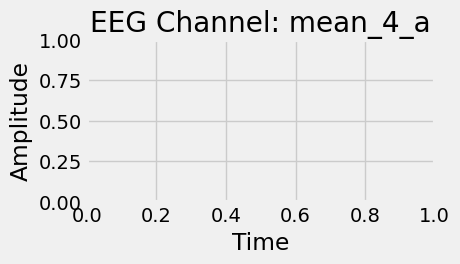

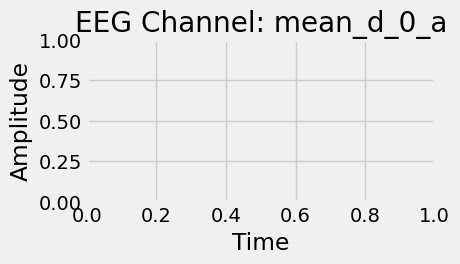

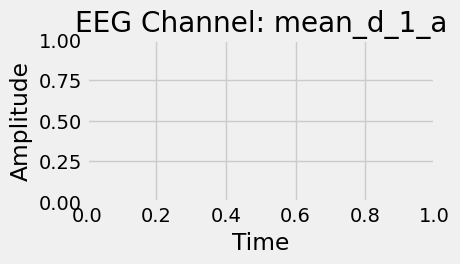

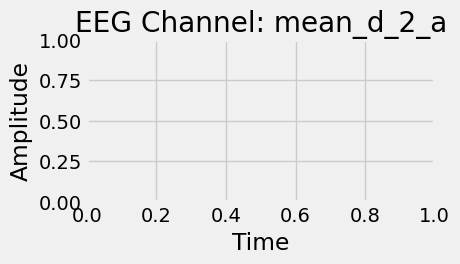

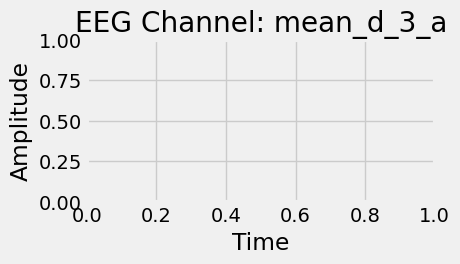

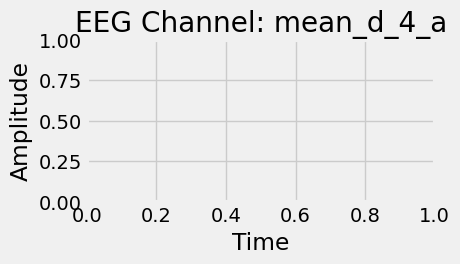

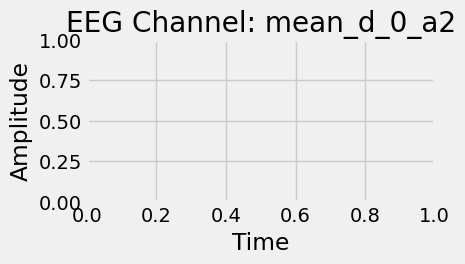

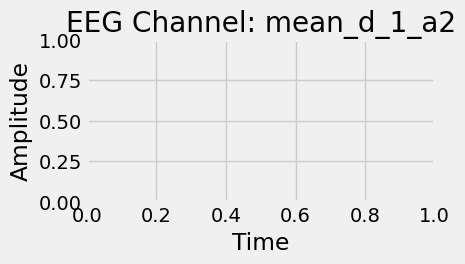

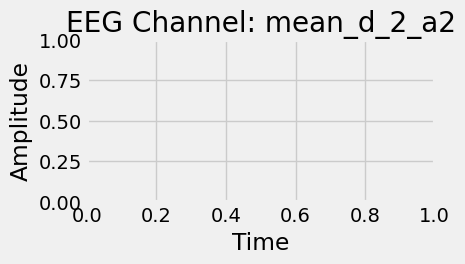

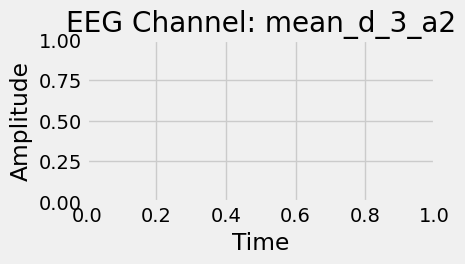

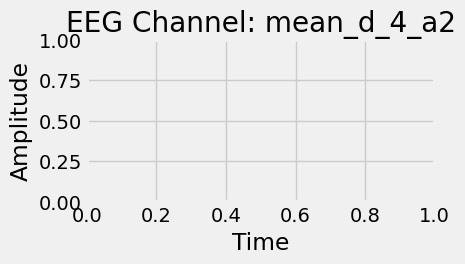

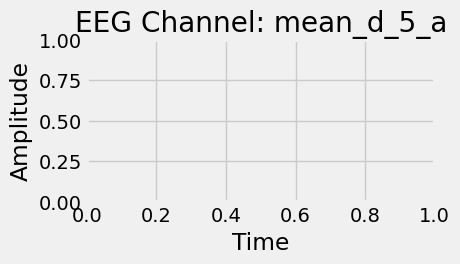

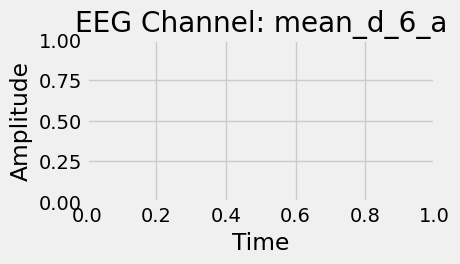

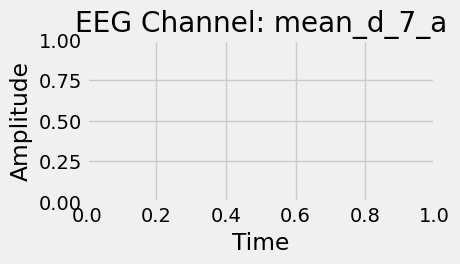

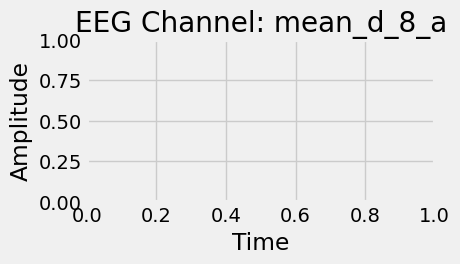

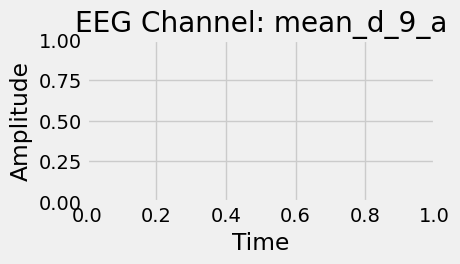

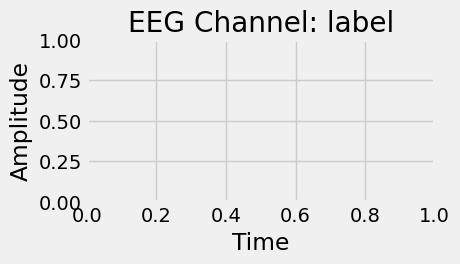

In [ ]:
# Plot a line plot for each EEG channel
eeg_channels = final_df.columns[1:] # Assuming the first column contains␣
#↪timestamps
for channel in eeg_channels:
  # if final_df[channel].dtype in [np.dtype('int64'), np.dtype('float64')]: # Check for numeric type
    plt.figure(figsize=(4, 2))
    # plt.plot(final_df[channel])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EEG Channel: ' + channel)
    plt.show()

In [ ]:
final_df.columns

Index(['mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a',
       'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2',
       'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2',
       'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a',
       'label'],
      dtype='object')

<Axes: xlabel='mean_1_a', ylabel='Density'>

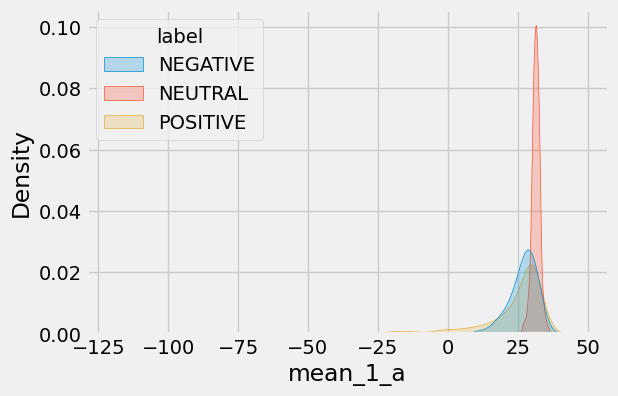

In [ ]:
plt.figure(figsize = (6,4))
sns.kdeplot(data=final_df,x='mean_1_a',hue='label',fill=True)

In [ ]:
selc_cols=final_df.iloc[:,:-1]
print(selc_cols)

      mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        30.30    -356.0     15.60      26.3       1.070       0.411   
1        33.10      32.0     25.80      22.8       6.550       1.680   
2        29.40    -416.0     16.70      23.7      79.900       3.360   
3        31.60    -143.0     19.80      24.3      -0.584      -0.284   
4        31.30      45.2     27.30      24.5      34.800      -5.790   
...        ...       ...       ...       ...         ...         ...   
1611     27.10      27.7     10.40      24.3       8.840       6.580   
1612     31.80      31.7     28.40      25.7       1.100       1.000   
1613     10.10      26.2     -9.75      25.6       1.450       3.030   
1614     19.40    -422.0      2.99      29.9       5.830      -3.410   
1615      7.84      20.6    -11.50      22.9       1.420       0.392   

      mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  \
0        -15.700       2.060       3.150         2.15        29.5

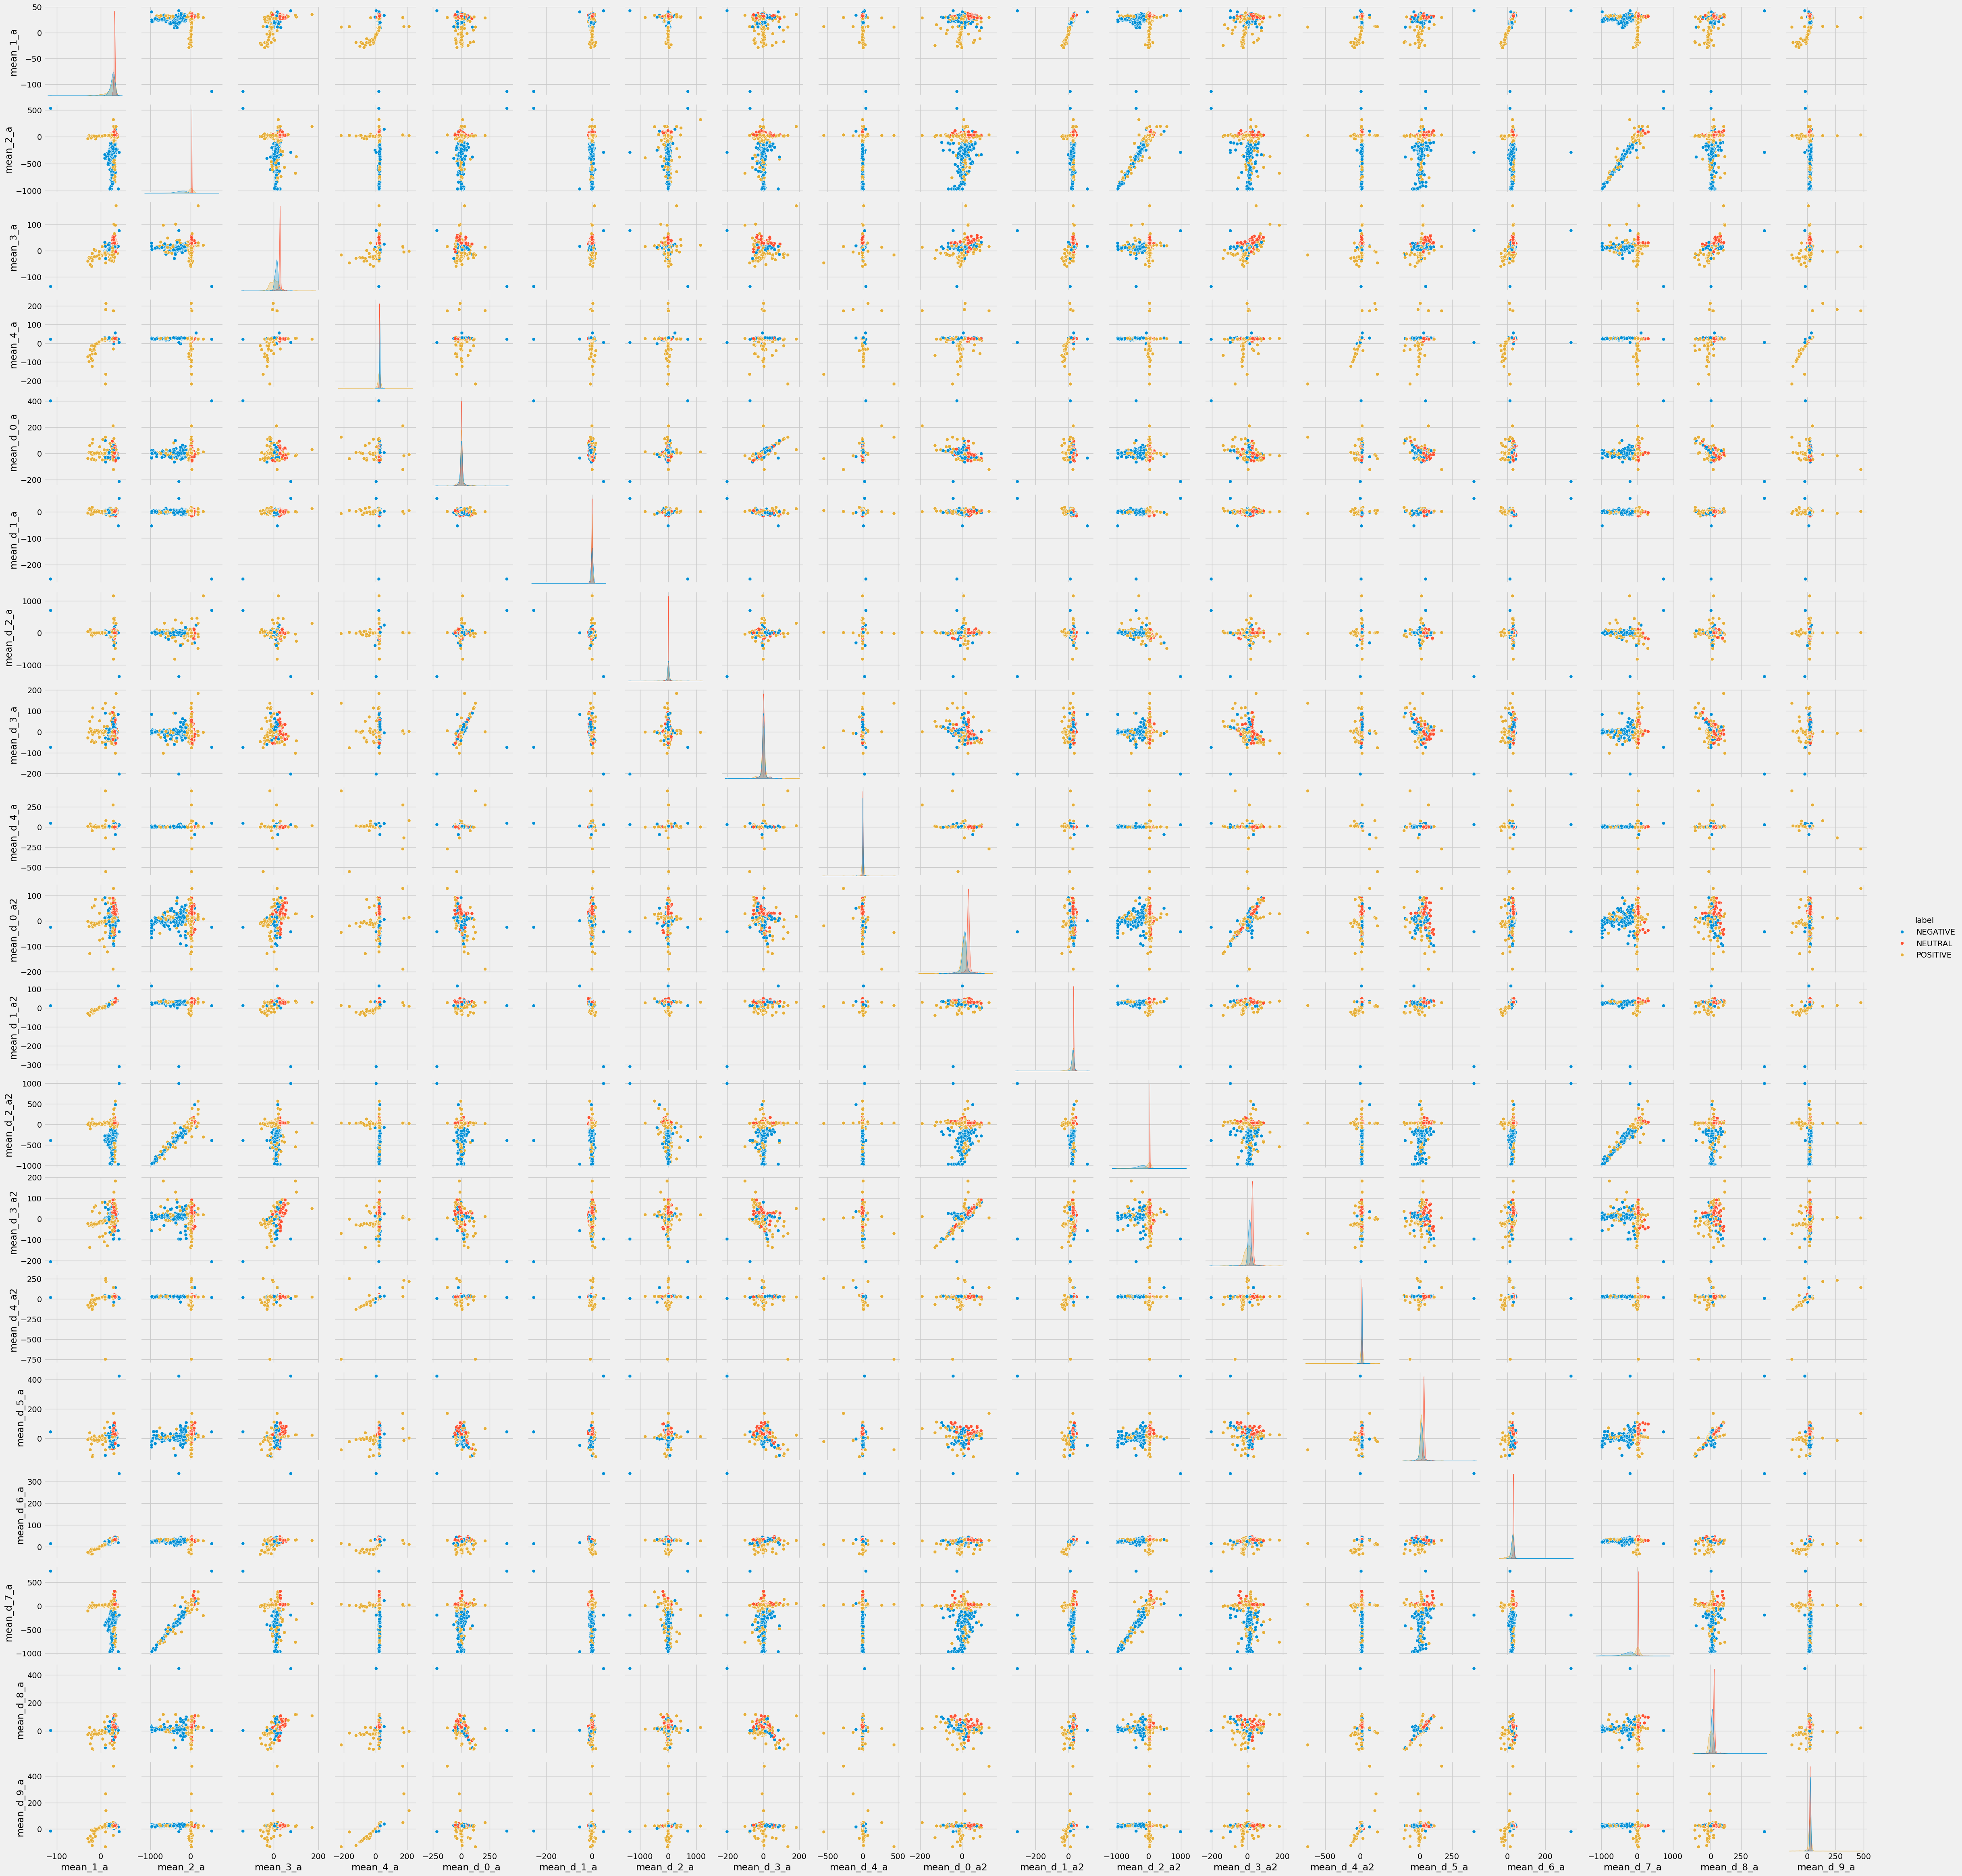

In [ ]:
#multivariate analysis
sns.pairplot(data=final_df,hue='label')

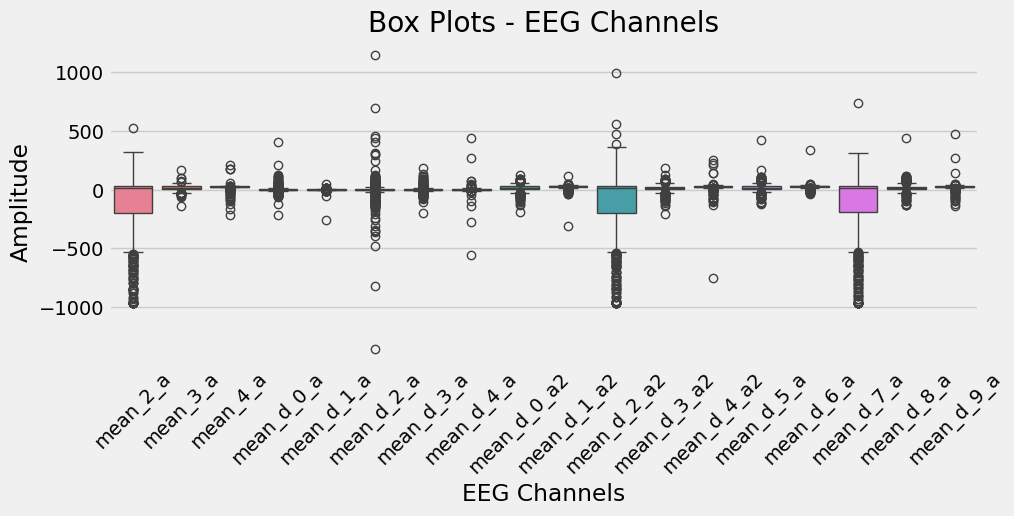

In [ ]:
# Generate box plots for each EEG channel
#Box plots can help visualize the distribution of EEG channel data and identify any outliers.
plt.figure(figsize=(10, 4))
sns.boxplot(data=final_df.iloc[:, 1:])
plt.xlabel('EEG Channels')
plt.ylabel('Amplitude')
plt.title('Box Plots - EEG Channels')
plt.xticks(rotation=45)
plt.show()

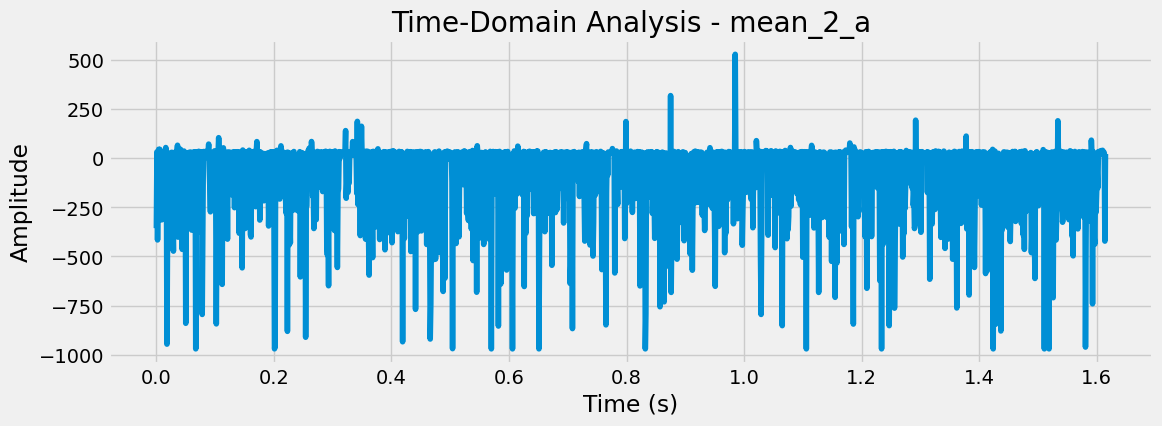

In [ ]:
# Example: Perform time-domain analysis for mean_2_a column
time_values = final_df['mean_2_a']
sampling_rate = 1000 # Assuming a sampling rate of 1000 Hz
time_in_seconds = np.arange(len(time_values)) / sampling_rate
plt.figure(figsize=(12, 4))
plt.plot(time_in_seconds, final_df['mean_2_a'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Analysis - mean_2_a')
plt.show()

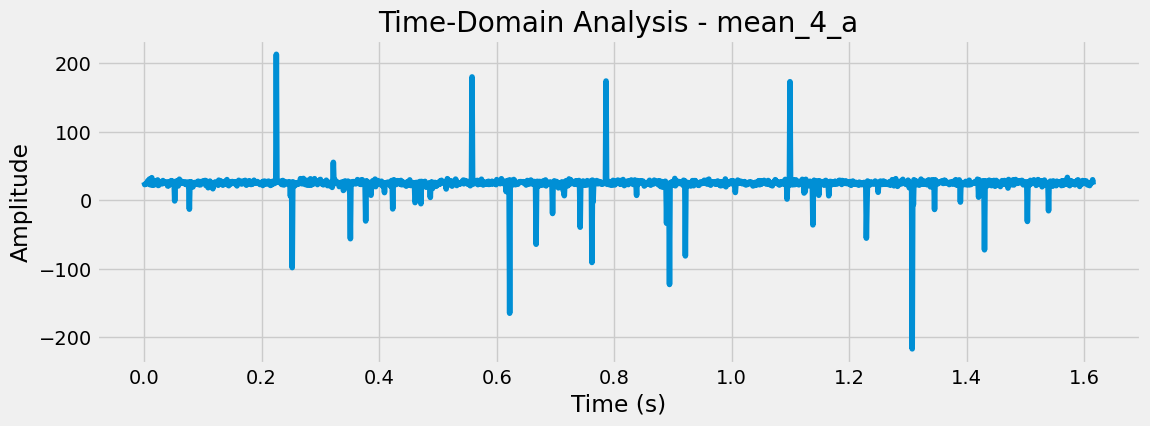

In [ ]:
# Example: Perform time-domain analysis for mean_4_a column
time_values = final_df['mean_4_a']
sampling_rate = 1000 # Assuming a sampling rate of 1000 Hz
time_in_seconds = np.arange(len(time_values)) / sampling_rate
plt.figure(figsize=(12, 4))
plt.plot(time_in_seconds, final_df['mean_4_a'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Analysis - mean_4_a')
plt.show()

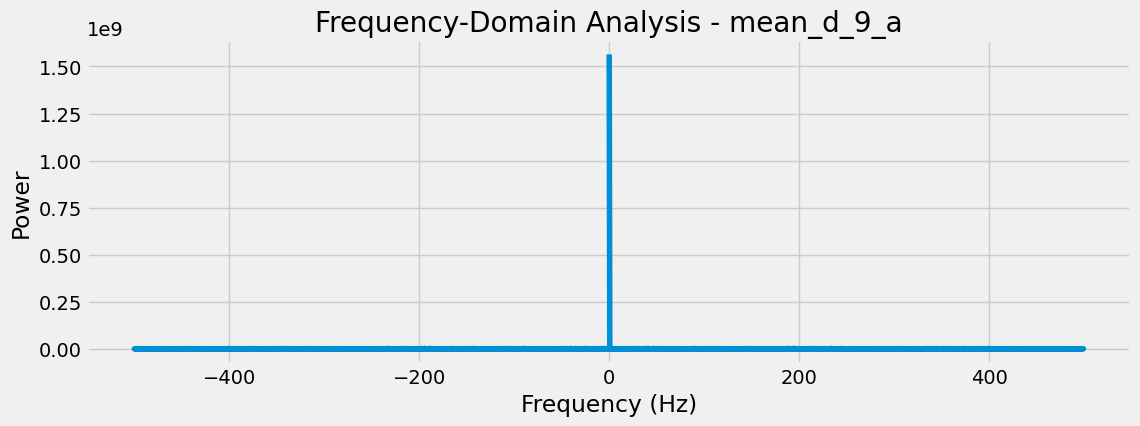

In [ ]:
# Example: Perform frequency-domain analysis (using Fast Fourier Transform)
# 'mean_d_9_a' is the EEG channel to analyze
signal = df['mean_d_9_a']
fft = np.fft.fft(signal)
power_spectrum = np.abs(fft) ** 2
frequencies = np.fft.fftfreq(len(signal), 1/sampling_rate)
plt.figure(figsize=(12, 4))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency-Domain Analysis - mean_d_9_a')
plt.show()

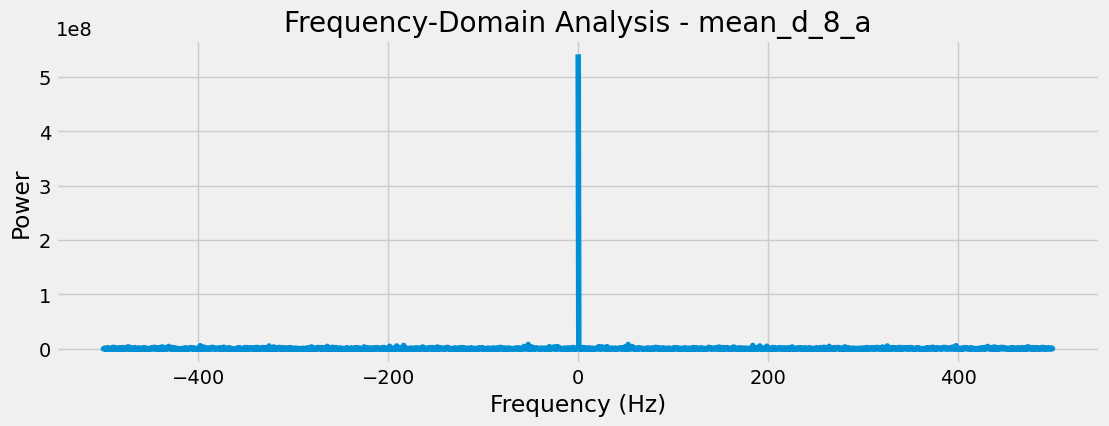

In [ ]:
# Example: Perform frequency-domain analysis (using Fast Fourier Transform)
# 'mean_d_8_a' is the EEG channel to analyze
signal = df['mean_d_8_a']
fft = np.fft.fft(signal)
power_spectrum = np.abs(fft) ** 2
frequencies = np.fft.fftfreq(len(signal), 1/sampling_rate)
plt.figure(figsize=(12, 4))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency-Domain Analysis - mean_d_8_a')
plt.show()

#Frequency domain analysis of EEG brain signals involves the transformation of the signal from
the time domain to the frequency domain. This analysis provides valuable information about the
frequency components #and their power distribution within the signal

In [ ]:
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import soundfile as sf

In [ ]:

import scipy

#Power Spectrum Density (PSD) analysis is a technique used in signal processing to estimate the
power distribution of a signal across different frequencies. #It provides information about the
power or energy contained within specific frequency components of a signal.

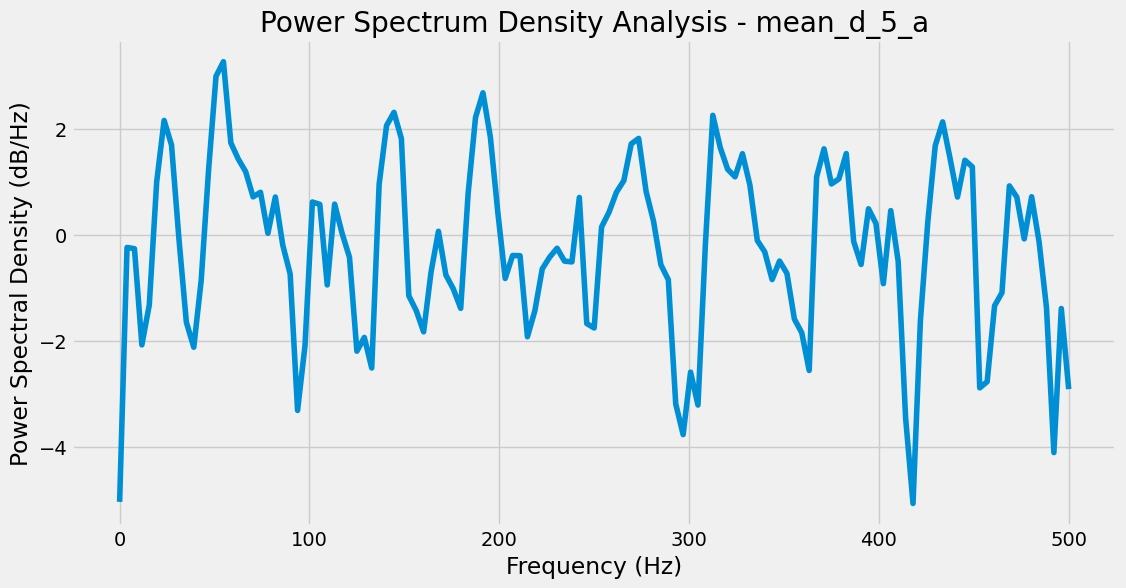

In [ ]:
#PSD analysis can provide insights into the dominant frequency components in an EEG signal.
signal = df['mean_d_5_a']
frequencies, psd = scipy.signal.welch(signal, fs=sampling_rate)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectrum Density Analysis - mean_d_5_a')
plt.show()

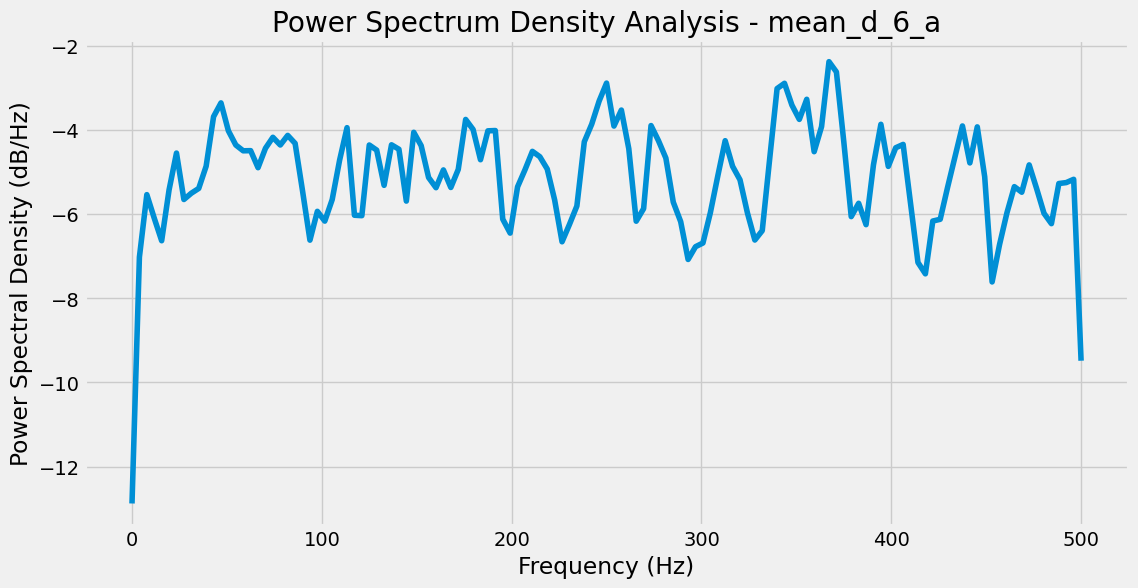

In [ ]:
#PSD analysis can provide insights into the dominant frequency components in an␣ EEG signal.
signal = df['mean_d_6_a']
frequencies, psd = scipy.signal.welch(signal, fs=sampling_rate)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectrum Density Analysis - mean_d_6_a')
plt.show()

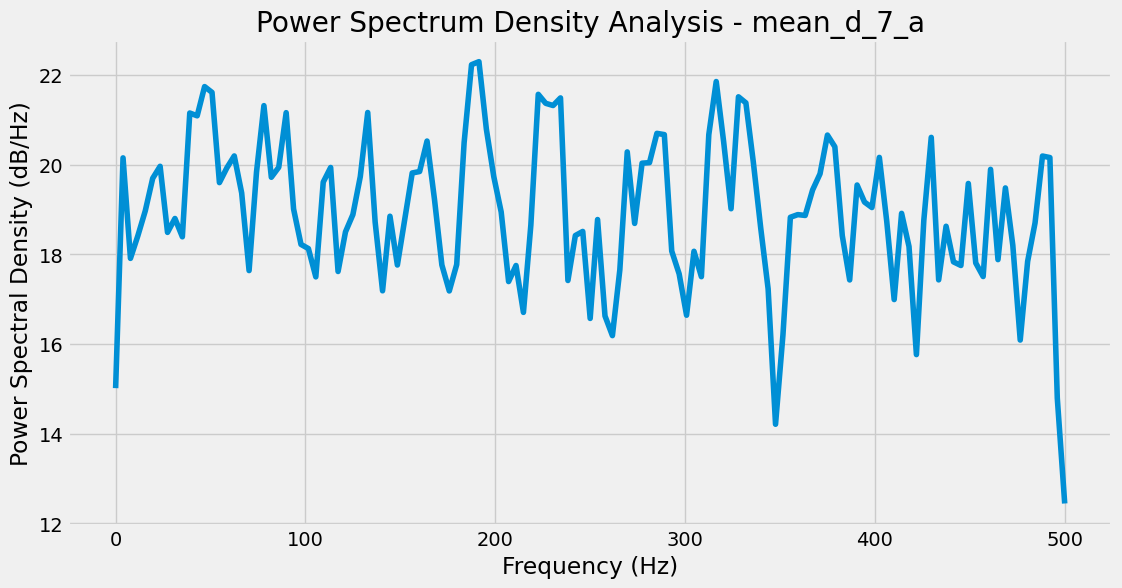

In [ ]:
#PSD analysis can provide insights into the dominant frequency components in an␣ EEG signal.
signal = df['mean_d_7_a']
frequencies, psd = scipy.signal.welch(signal, fs=sampling_rate)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectrum Density Analysis - mean_d_7_a')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

#X = df.drop(columns=["label"]).values
X= selc_cols
y = df["label"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
print( y_train.shape)




# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")


(1292, 19, 1)
(1292,)


In [ ]:
model = keras.Sequential([
layers.Conv1D(32, kernel_size=3, activation="relu", padding="same", input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=1),
    layers.Conv1D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(np.unique(y_encoded)), activation="softmax")
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6440 - loss: 1.0160 - val_accuracy: 0.7253 - val_loss: 0.5561
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7850 - loss: 0.4768 - val_accuracy: 0.8765 - val_loss: 0.4312
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8887 - loss: 0.3230 - val_accuracy: 0.9043 - val_loss: 0.4118
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9143 - loss: 0.2454 - val_accuracy: 0.9352 - val_loss: 0.2894
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9499 - loss: 0.1582 - val_accuracy: 0.9537 - val_loss: 0.2480
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9352 - loss: 0.1726 - val_accuracy: 0.9506 - val_loss: 0.1899
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9467 - loss: 0.1396 - val_accuracy: 0.9691 - val_loss: 0.1280
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9591 - loss: 0.1059 - val_accuracy: 0.9444 - val_lo

In [ ]:
import numpy as np

def predict_emotion(model, scaler, label_encoder):
    print("Enter the feature values (separated by spaces):")
    user_input = input()

    try:

        input_values = np.array([float(x) for x in user_input.split()])

        if len(input_values) != scaler.mean_.shape[0]:
            print(f"Expected {scaler.mean_.shape[0]} features, but got {len(input_values)}. Please try again.")
            return
        input_scaled = scaler.transform([input_values])
        input_reshaped = input_scaled.reshape(1, input_scaled.shape[1], 1)
        prediction = model.predict(input_reshaped)
        predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

        print(f"Predicted Emotion: {predicted_label}")

    except ValueError:
        print("Invalid input. Please enter numerical values only.")





In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9624 - loss: 0.2627 
Test Accuracy: 0.9506


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


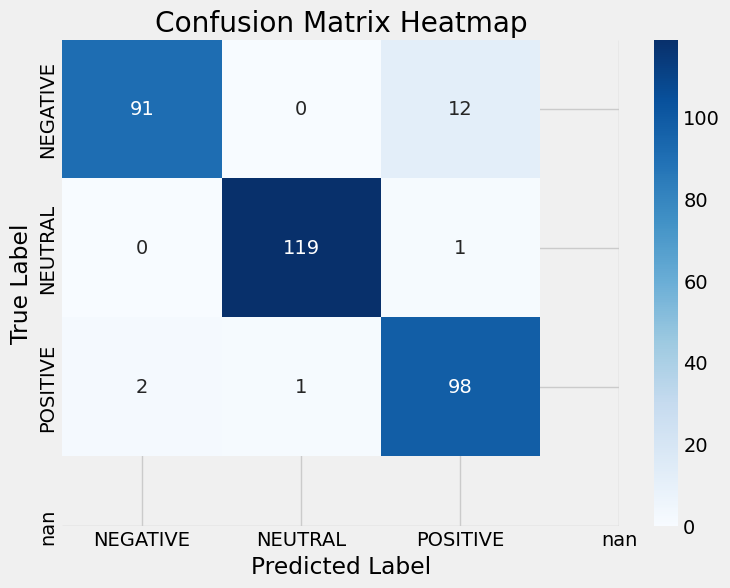

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
# Call the function after training the model
predict_emotion(model, scaler, label_encoder)

Enter the feature values (separated by spaces):


KeyboardInterrupt: Interrupted by user

In [ ]:
# import pickle
# model.save("emotion_cnn_model.h5")
# with open("scaler_label_encoder.pkl", "wb") as f:
#     pickle.dump({"scaler": scaler, "label_encoder": label_encoder}, f)




# # # **Different Classification Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = './emotions.csv'  # Replace with the actual path to the file
data = pd.read_csv(file_path)

# Check for and handle missing values here (not necessary here as no data is missing)

# Encoding categorical labels if the label column is categorical
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # Assuming 'label' is the column name for labels

# Separating features and labels
X = data.drop('label', axis=1)
#print(X)
y = data['label']
#print(y)
# Normalize or standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#zzprint(X_test.shape[1:])

[[-0.69608594  0.35491199 -1.21724379 ... -1.06084278 -1.06084278
   0.91015287]
 [ 0.88626748  0.65719091  0.66420935 ...  0.16401498  0.16401498
  -0.45550631]
 [-0.41600022  0.25775091 -1.50819016 ... -0.92933964 -0.92933964
   0.91507541]
 ...
 [-1.03421746  0.13899848 -0.74688051 ...  0.36220899  0.36220899
  -1.30006583]
 [ 0.10098042 -0.76783828 -0.88750458 ... -2.0846886  -2.0846886
   2.24908269]
 [ 0.76847442  0.53843848  0.66323953 ...  0.67499859  0.67499859
  -0.50118745]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier




In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

model =KNeighborsClassifier()
name = "KNeighborsClassifier"
ans=model.fit(X_train,y_train)
ypred = model.predict(X_test)


print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")


KNeighborsClassifier  with accuracy : 0.9320843091334895


In [ ]:
input_data = np.zeros((1, 2548))  # Create a placeholder with 2548 features

# Ensure exactly 19 values
new_situation = [31.409358, 30.972022, 27.381816, 24.669274, -0.044993,
          0.005013, 0.024418, -0.044251, 0.016043, 28.171289,
          31.512849, 30.549680, 26.585743, 24.526732, 29.556690,
          31.305307, 0, 0, 0]  # Adding three 0s to make 19

input_data[0, :19] = new_situation  # Now it matches 19 features

val = model.predict(input_data)
print(val)

[1]


In [ ]:
print(df.label)

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
1611    POSITIVE
1612     NEUTRAL
1613    POSITIVE
1614    NEGATIVE
1615         NaN
Name: label, Length: 1616, dtype: object


<Figure size 1200x1000 with 0 Axes>

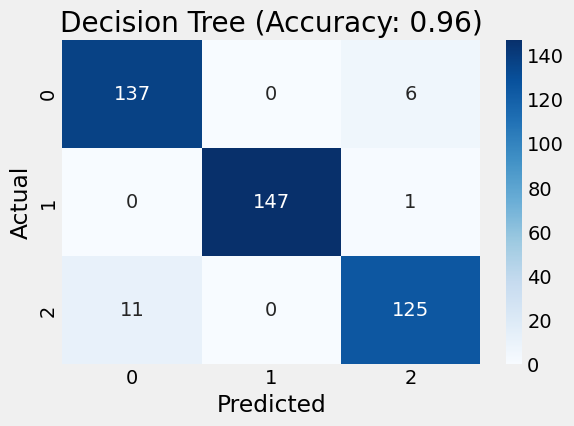

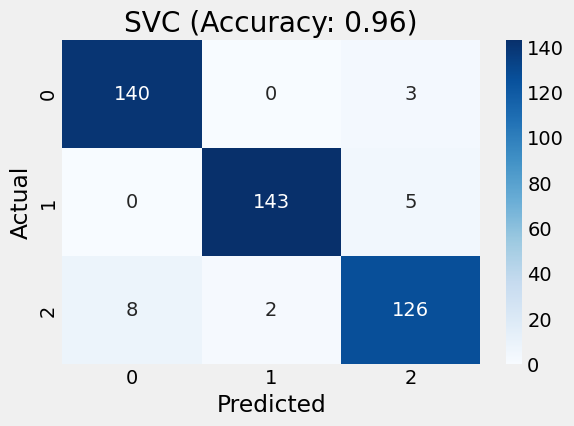

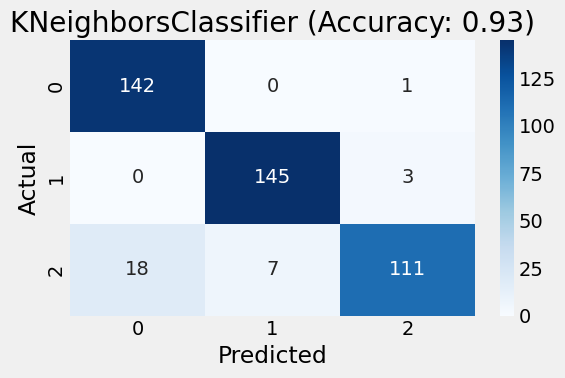

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Define the 'models' dictionary here
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

# Initialize a figure
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot heatmap
    plt.subplots( figsize=(6,4))  # Adjust grid layout if needed
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

    plt.title(f"{name} (Accuracy: {accuracy_score(y_test, y_pred):.2f})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

# Adjust layout and show

plt.tight_layout()
plt.show()


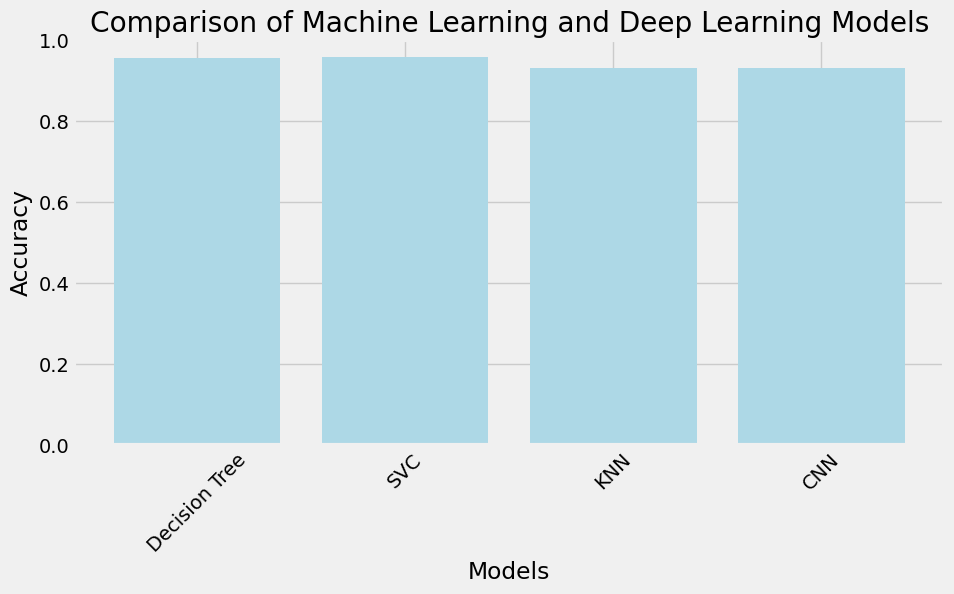

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dictionary to store accuracies
model_accuracies = {}

# Machine Learning Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),

}

# Train and evaluate ML models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Store accuracy

# Deep Learning Model (CNN) - Access the CNN model from previous cell's output
# Assuming 'model' was previously trained and its name is 'cnn_model'
# cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)
# If the CNN model is in an earlier cell in the notebook and the output has been deleted,
# you'll need to re-run the cell that created the CNN model.
cnn_test_loss, cnn_test_acc = model.score(X_test, y_test), accuracy_score(y_test,model.predict(X_test)) #changed evaluate to score
model_accuracies["CNN"] = cnn_test_acc  # Store CNN accuracy

# Plot the accuracy comparison as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Machine Learning and Deep Learning Models")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

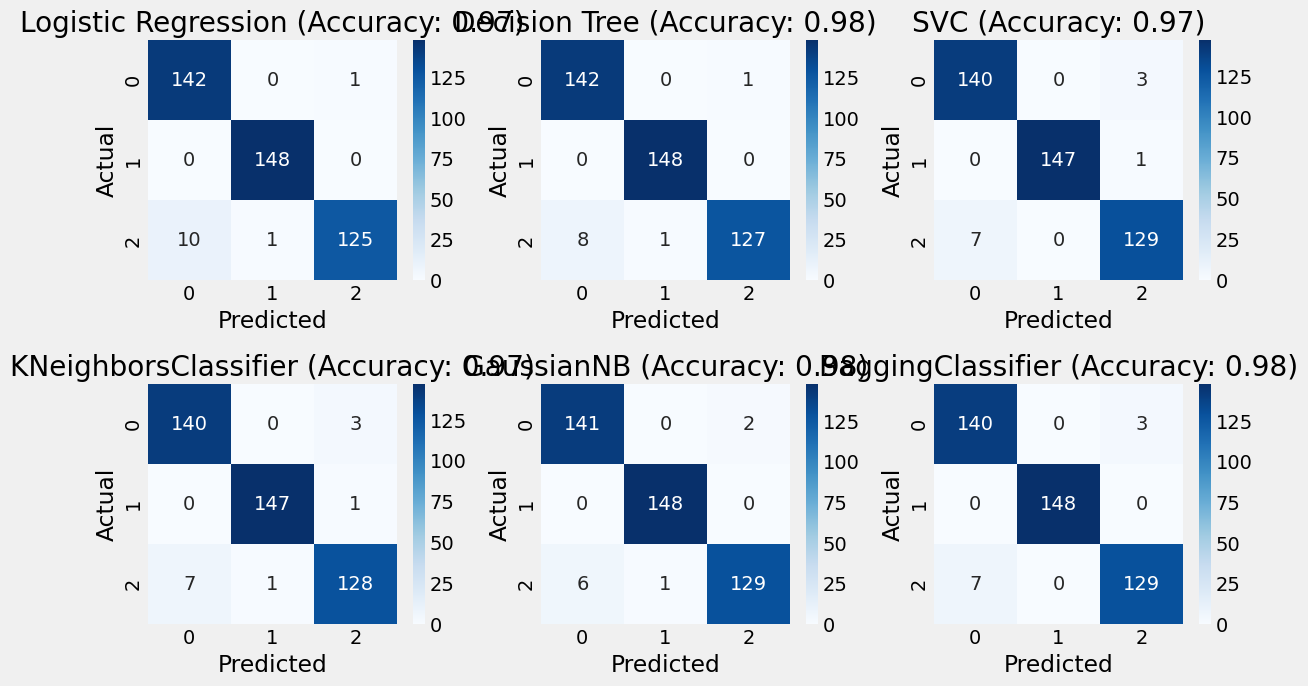

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, accuracy_score

# # Initialize a figure
# plt.figure(figsize=(12, 10))

# for i, (name, models) in enumerate(models.items(), 1):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Compute confusion matrix
#     cm = confusion_matrix(y_test, y_pred)

#     # Plot heatmap
#     plt.subplot(3, 3, i)  # Adjust grid layout if needed
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

#     plt.title(f"{name} (Accuracy: {accuracy_score(y_test, y_pred):.2f})")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")

# # Adjust layout and show
# plt.tight_layout()
# plt.show()


In [ ]:
# # Situational Context Analysis (SCA) Function
# def situational_context_analysis(X, y, models, test_size=0.2, random_state=42, add_noise=False, imbalance=False):
#     """
#     Evaluate multiple models across different situations like noise handling and class imbalance.

#     Args:
#         X (DataFrame or ndarray): Features dataset.
#         y (Series or ndarray): Target labels.
#         models (dict): Dictionary of models to evaluate.
#         test_size (float): Fraction of the dataset to use as test data.
#         random_state (int): Random seed for reproducibility.
#         add_noise (bool): Whether to introduce noise in the dataset.
#         imbalance (bool): Whether to simulate an imbalanced dataset using SMOTE.

#     Returns:
#         None: Prints evaluation metrics and plots for each model.
#     """

#     # Split dataset into train and test sets
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#     # Handle class imbalance with SMOTE if requested
#     if imbalance:
#         smote = SMOTE(random_state=random_state)
#         X_train, y_train = smote.fit_resample(X_train, y_train)

#     # Standardize the features (scaling)
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Optionally add noise to the dataset
#     if add_noise:
#         noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Add Gaussian noise
#         X_train_scaled += noise

#     # Evaluate each model
#     for name, model in models.items():
#         print(f"\nEvaluating {name} Model:")

#         # Train the model
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)

#         # Baseline Accuracy
#         accuracy = accuracy_score(y_test, y_pred)
#         print(f"Accuracy: {accuracy:.4f}")

#         # Confusion Matrix
#         print("Confusion Matrix:")
#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
#         plt.title(f"Confusion Matrix: {name}")
#         plt.show()

#         # Classification Report (Precision, Recall, F1-Score)
#         print("Classification Report:")
#         print(classification_report(y_test, y_pred))

#         # ROC AUC (for binary classification)
#         if len(np.unique(y)) == 2:  # Check if it's binary classification
#             try:
#                 roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
#                 print(f"ROC AUC Score: {roc_auc:.4f}")

#                 # ROC Curve
#                 fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
#                 plt.plot(fpr, tpr, label=f'{name} ROC curve')
#                 plt.plot([0, 1], [0, 1], 'k--')
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title(f'ROC Curve: {name}')
#                 plt.legend(loc='best')
#                 plt.show()
#             except AttributeError:
#                 print("ROC AUC Score: Not available for this model")

#         # Precision-Recall Curve (useful for imbalanced data)
#         precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
#         plt.plot(recall, precision, label=f'{name} Precision-Recall curve')
#         plt.xlabel('Recall')
#         plt.ylabel('Precision')
#         plt.title(f'Precision-Recall Curve: {name}')
#         plt.legend(loc='best')
#         plt.show()

#         # Cross-validation score
#         cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
#         print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#         print("\n" + "-"*50)

# # Run Situational Context Analysis
# situational_context_analysis(X, y, models, add_noise=True, imbalance=True)

In [ ]:
# print(scores)

In [ ]:
# import pickle

# # Save the model
# pickle.dump(model, open("/content/model_saved.pkl", "wb"))

# # Load the model
# model_loaded = pickle.load(open("/content/model_saved.pkl", "rb"))


In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Embedding
# from tensorflow.keras.metrics import Accuracy
# from transformers import TFBertForSequenceClassification, BertTokenizer
# from tensorflow.keras.layers import Flatten  # Import Flatten layer

# # Train and evaluate traditional classifiers (as previously described)

# # Prepare dataset for deep learning models (if necessary)
# # This step depends on the nature of your data and the requirements of each model.

# # Define a function to create and train a deep learning model
# def train_evaluate_dl_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     return accuracy
# scores = []
# # CNN
# cnn_model = Sequential([
#     # Add CNN layers - adjust input shape, filters, kernel size as needed
#     Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['CNN'] = train_evaluate_dl_model(cnn_model, X_train, y_train, X_test, y_test)
# # RNN
# rnn_model = Sequential([
#     # Add RNN layers - adjust input shape as needed
#     SimpleRNN(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
#     SimpleRNN(50),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['RNN'] = train_evaluate_dl_model(rnn_model, X_train, y_train, X_test, y_test)

# # LSTM
# lstm_model = Sequential([
#     # Add LSTM layers - adjust input shape as needed
#     LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
#     LSTM(50),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['LSTM'] = train_evaluate_dl_model(lstm_model, X_train, y_train, X_test, y_test)


In [ ]:
# # Plotting
# plt.figure(figsize=(10, 6))
# plt.bar(scores.keys(), scores.values(), color='skyblue')
# plt.ylabel('Accuracy')
# plt.title('Model Comparison')
# plt.xticks(rotation=45)
# plt.show()

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Embedding
from tensorflow.keras.metrics import Accuracy
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.layers import Flatten  # Import Flatten layer

# Train and evaluate traditional classifiers (as previously described)

# Prepare dataset for deep learning models (if necessary)
# This step depends on the nature of your data and the requirements of each model.

# Define a function to create and train a deep learning model
def train_evaluate_dl_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Initialize scores as a dictionary
scores = {}  # Changed from list to dictionary

# CNN
cnn_model = Sequential([
    # Add CNN layers - adjust input shape, filters, kernel size as needed
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(len(set(y)), activation='softmax')
])
scores['CNN'] = train_evaluate_dl_model(cnn_model, X_train, y_train, X_test, y_test)

# RNN
rnn_model = Sequential([
    # Add RNN layers - adjust input shape as needed
    SimpleRNN(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    SimpleRNN(50),
    Dense(len(set(y)), activation='softmax')
])
scores['RNN'] = train_evaluate_dl_model(rnn_model, X_train, y_train, X_test, y_test)

# LSTM
lstm_model = Sequential([
    # Add LSTM layers - adjust input shape as needed
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(50),
    Dense(len(set(y)), activation='softmax')
])
scores['LSTM'] = train_evaluate_dl_model(lstm_model, X_train, y_train, X_test, y_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='skyblue') # Now scores is a dictionary and has keys() and values() methods.
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Embedding
# from tensorflow.keras.metrics import Accuracy
# from transformers import TFBertForSequenceClassification, BertTokenizer
# from tensorflow.keras.layers import Flatten  # Import Flatten layer

# # Train and evaluate traditional classifiers (as previously described)

# # Prepare dataset for deep learning models (if necessary)
# # This step depends on the nature of your data and the requirements of each model.

# # Define a function to create and train a deep learning model
# def train_evaluate_dl_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     return accuracy

# # Initialize scores as a dictionary
# scores = {}  # Changed from list to dictionary

# # CNN
# cnn_model = Sequential([
#     # Add CNN layers - adjust input shape, filters

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Embedding
# from tensorflow.keras.metrics import Accuracy
# from transformers import TFBertForSequenceClassification, BertTokenizer
# from tensorflow.keras.layers import Flatten  # Import Flatten layer

# # Train and evaluate traditional classifiers (as previously described)

# # Prepare dataset for deep learning models (if necessary)
# # This step depends on the nature of your data and the requirements of each model.

# # Define a function to create and train a deep learning model
# def train_evaluate_dl_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     return accuracy

# # Initialize scores as a dictionary
# scores = {}  # Changed from list to dictionary

# # CNN
# cnn_model = Sequential([
#     # Add CNN layers - adjust input shape, filters, kernel size as needed
#     Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['CNN'] = train_evaluate_dl_model(cnn_model, X_train, y_train, X_test, y_test)

# # RNN
# rnn_model = Sequential([
#     # Add RNN layers - adjust input shape as needed
#     SimpleRNN(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
#     SimpleRNN(50),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['RNN'] = train_evaluate_dl_model(rnn_model, X_train, y_train, X_test, y_test)

# # LSTM
# lstm_model = Sequential([
#     # Add LSTM layers - adjust input shape as needed
#     LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
#     LSTM(50),
#     Dense(len(set(y)), activation='softmax')
# ])
# scores['LSTM'] = train_evaluate_dl_model(lstm_model, X_train, y_train, X_test, y_test)